In [1]:
import numpy as np

In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1

In [ ]:
#Method 1
img = cv.imread("flower.jfif")
img_gray = cv.imread('flower.jfif', 0)


cv.imshow("enlarge", img)
cv.imshow("show", img_gray)
cv.waitKey(0)
cv.destroyAllWindows()

(-0.5, 299.5, 167.5, -0.5)

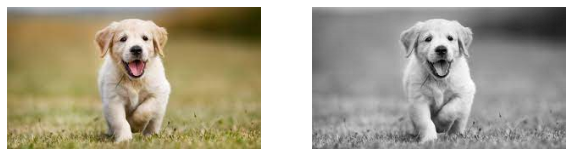

In [3]:
#Method 2

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
  
# reading images
Image1 = cv.imread('dog.png')
Image2 = cv.imread('dog.png', 0)

# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(Image1[:,:,::-1])
plt.axis('off')

# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(Image2, cmap = "gray")
plt.axis('off')

## Exercise 2

In [9]:
video = cv.VideoCapture('img_pexels.mp4')

#create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MP4V')
fps = 30.0
width = int(video.get(3))
height = int(video.get(4))
output = cv.VideoWriter('smaller_img_pexels.mp4', fourcc, fps, (width, height))


# Check if the object has been created successfully
if not video.isOpened():
    print("Unable to create video")

# Read until the video is completed.
while video.isOpened():
    ret, frame = video.read()
    
    # if frame is read then ret is True
    if not ret:
        print("Can't receive frame.")
        break
        
    
    output.write(frame)
    
    cv.namedWindow('frame',cv.WINDOW_NORMAL)
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. 
    if cv.waitKey(1) & 0xFF == 27:
        break

# destroy the constructor
video.release()
output.release()
cv.destroyAllWindows()

## Exercise 3

In [24]:
from PIL import Image

image_array = np.random.random((720,1080))

img = Image.fromarray(image_array,'L')
img.show()

## Exercise 4

In [26]:
img = cv.imread("flower.jfif")
cv.imshow("flower", img)
cv.waitKey(0)
cv.destroyAllWindows()

img.shape

(183, 275, 3)

In [28]:
new_img = img[35:125, 90:175]
cv.imshow("work", new_img)
cv.waitKey()
cv.destroyAllWindows()

## Exercise 5

In [55]:
img = cv.imread("dog.jfif")
cv.imshow("enlarge", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Linear

In [80]:
#check the performance
%timeit img_resize_linear = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_LINEAR)


111 µs ± 3.47 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [90]:
#output to check file size
cv.imwrite('Linear.png',img_resize_linear)
cv.imshow("enlarge", img_resize_linear)
cv.waitKey(0)
cv.destroyAllWindows()

### Cubic

In [87]:
#check the performance
%timeit img_resize_cubic = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_CUBIC)



240 µs ± 791 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [91]:
#output to check file size
cv.imwrite('Cubic.png', img_resize_cubic)
cv.imshow("enlarge", img_resize_cubic)
cv.waitKey(0)
cv.destroyAllWindows()

### Nearest

In [84]:
#check the performance
%timeit img_resize_nearest = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_NEAREST)


69.8 µs ± 2.92 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [92]:
#output to check file size
cv.imwrite('Nearest.png', img_resize_nearest)
cv.imshow("enlarge", img_resize_nearest)
cv.waitKey(0)
cv.destroyAllWindows()

## Comments on the upscaled of all the outputs

| Interpolation    | Linear  | Cubic      | Nearest Neighbour     |
| :---        |    :----:           |          :----:         |                              ----: |
| **Performance** | Moderate       | Worst  | Best      |
| **Output Quality**   | Moderate        | Highest      | Lowest      |
| **Output File Size**   | Moderate        | Biggest      | Smallest      |


Cubic has the most complex calculation so its performance is the worst in terms of processing time but its output quality is the best. Since its quality is the best, its file size is the largest too. The Nearest Neighbour algorithm has the smallest file size even though its pixel size is the same with Cubic because the file is compressed into fewer bytes hence its lowest output quality. 






The file sizes of all the outputs:
    ![file_size](filesize.jpeg "size")